# Unit 5 - Financial Planning

In [36]:
# Initial imports
import os
import warnings
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

%matplotlib inline

In [37]:
# Load .env enviroment variables
load_dotenv()   

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [38]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [39]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [40]:
# Fetch current BTC price
btc_price_data = requests.get(btc_url).json()
btc_price_data

# Fetch current ETH price
eth_price_data = requests.get(eth_url).json()
eth_price_data

# Compute current value of my crpto
my_btc_value = btc_price_data['data']['1']['quotes']['USD']['price']
my_eth_value = eth_price_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61692.00
The current value of your 5.3 ETH is $3010.95


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [41]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [42]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [43]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start= today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_portfolio

AGG                                       \
                            close    high      low trade_count    open   
timestamp                                                                
2020-08-07 04:00:00+00:00  119.43  119.73  119.395       15247  119.66   

                                                   SPY                 \
                            volume        vwap   close    high    low   
timestamp                                                               
2020-08-07 04:00:00+00:00  6229081  119.470433  334.57  334.88  332.3   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00      349308  333.28  57978084  333.809718

In [44]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_24411/4254263255.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["AGG"]["close"])
/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_24411/4254263255.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["SPY"]["close"])


In [45]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [46]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value
stock_assets = my_agg_value + my_spy_value

#Setting current amount of shares data
savings_data = {
    "amount": [crypto_assets, stock_assets]
}

#Setting the assets 
assets = ["crypto", "shares"]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, index= assets)

# Display savings DataFrame
display(savings_df)

,amount
crypto,64702.95
shares,40614.50


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

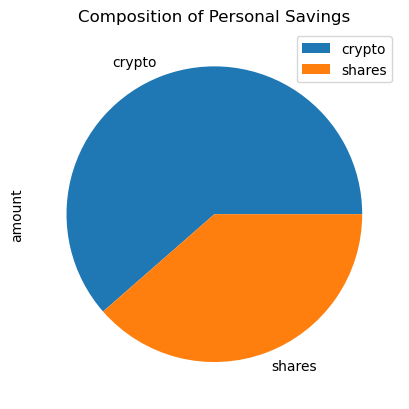

In [47]:
# Plot savings pie chart
savings_df.plot.pie(y= "amount", title = "Composition of Personal Savings")

In [48]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_df["amount"].sum()

# Validate saving health

#If total savings are greater than the emergency fund
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund!")

#If total savings are equal to emergency fund
elif total_savings == emergency_fund:
    print(f"You have reached your financial goal!")

#If total savings are less than emergency fund 
else: print("Sorry, you are ${emergency_fund - total_savings} from reaching your goal.")

Congratulations! You have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [49]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [50]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end = end_date
).df

# Reorganize the DataFrame
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2016-01-04 05:00:00+00:00  107.97  108.29  107.93       14860  108.09   
2016-01-05 05:00:00+00:00  108.02  108.12  107.87        8860  107.87   
2016-01-06 05:00:00+00:00  108.43  108.46  108.22       13183  108.35   
2016-01-07 05:00:00+00:00  108.42  108.47  108.21       12305  108.40   
2016-01-08 05:00:00+00:00  108.66  108.71  108.35       11442  108.57   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-01-04 05:00:00+00:00  3821479  108.078566  201.0192  201.03  198.59   
2016-01-05 05:00:00+00:00  2757684  107.990501  201.3600  201.90  200.05   
2016-01-06 05:00:00+00:00  3048156  108.363216  198.8200  200.06  197.60   
2016-01-07 05:00:00+00:00  2530827  108.368381  194.0500  197.44  193.59   
2016-01-08 05:00:00+00:00  4047091  108.587804  191.9230  195.85  191.58   

                                                                       
                          trade_count     open     volume        vwap  
timestamp                                                              
2016-01-04 05:00:00+00:00      655489  200.490  225903783  200.656423  
2016-01-05 05:00:00+00:00      418709  201.405  112719152  201.084280  
2016-01-06 05:00:00+00:00      548386  198.330  153948196  198.956460  
2016-01-07 05:00:00+00:00      796451  195.330  216191953  195.345911  
2016-01-08 05:00:00+00:00      754102  195.190  216105404  193.644537

In [51]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [0.6, 0.4],
    num_simulation= 500,
    num_trading_days= 252*30
)

In [52]:
# Printing the simulation input data
MC_portfolio.portfolio_data.head()

AGG                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2016-01-04 05:00:00+00:00  107.97  108.29  107.93       14860  108.09   
2016-01-05 05:00:00+00:00  108.02  108.12  107.87        8860  107.87   
2016-01-06 05:00:00+00:00  108.43  108.46  108.22       13183  108.35   
2016-01-07 05:00:00+00:00  108.42  108.47  108.21       12305  108.40   
2016-01-08 05:00:00+00:00  108.66  108.71  108.35       11442  108.57   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-01-04 05:00:00+00:00  3821479  108.078566          NaN  201.0192  201.03   
2016-01-05 05:00:00+00:00  2757684  107.990501     0.000463  201.3600  201.90   
2016-01-06 05:00:00+00:00  3048156  108.363216     0.003796  198.8200  200.06   
2016-01-07 05:00:00+00:00  2530827  108.368381    -0.000092  194.0500  197.44   
2016-01-08 05:00:00+00:00  4047091  108.587804     0.002214  191.9230  195.85   

                                                                               \
                              low trade_count     open     volume        vwap   
timestamp                                                                       
2016-01-04 05:00:00+00:00  198.59      655489  200.490  225903783  200.656423   
2016-01-05 05:00:00+00:00  200.05      418709  201.405  112719152  201.084280   
2016-01-06 05:00:00+00:00  197.60      548386  198.330  153948196  198.956460   
2016-01-07 05:00:00+00:00  193.59      796451  195.330  216191953  195.345911   
2016-01-08 05:00:00+00:00  191.58      754102  195.190  216105404  193.644537   

                                        
                          daily_return  
timestamp                               
2016-01-04 05:00:00+00:00          NaN  
2016-01-05 05:00:00+00:00     0.001695  
2016-01-06 05:00:00+00:00    -0.012614  
2016-01-07 05:00:00+00:00    -0.023992  
2016-01-08 05:00:00+00:00    -0.010961

In [53]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998056,1.000191,0.996499,1.000006,0.995207,1.004788,1.004006,1.001695,1.003899,1.001311,...,0.996130,1.002616,1.004287,1.011460,1.000543,1.004188,0.993959,0.991390,1.003840,0.998625
2,0.991709,0.993866,0.993056,1.001113,0.989108,0.999022,1.001538,1.009305,1.006287,1.005276,...,0.995452,0.998291,1.004212,1.011983,0.994489,1.003000,0.994965,0.990166,1.002586,0.994733
3,0.994153,0.984669,0.992989,1.000551,0.986245,0.998674,0.993636,1.011166,1.009175,1.009456,...,0.993517,1.005199,0.997030,1.011857,0.998794,0.998882,0.999533,0.999271,1.008726,1.000424
4,0.994034,0.985022,1.000793,1.001328,0.986098,0.999121,0.997154,1.000517,1.014749,1.002983,...,1.002210,1.008728,1.008305,1.016223,0.994086,0.999565,0.991807,1.007210,1.006879,0.993461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.932379,6.070909,8.233931,4.493231,6.976443,3.987944,6.463205,4.933992,9.550265,5.863527,...,3.183790,9.869351,2.985725,3.629661,16.961855,6.363527,3.703885,4.312270,5.980016,6.855286
7557,7.987569,6.079770,8.266920,4.491125,7.013151,3.985686,6.472952,4.933412,9.519904,5.851633,...,3.180138,9.783800,3.001687,3.650825,16.887332,6.360997,3.699609,4.324860,5.961534,6.820590
7558,7.910730,6.097553,8.262017,4.461749,6.982796,3.963311,6.472562,4.926760,9.458184,5.834755,...,3.153484,9.747970,3.015798,3.644602,16.900448,6.373127,3.710032,4.327134,5.963724,6.826441
7559,7.937929,6.136124,8.196525,4.460412,6.977683,3.957851,6.486822,4.953312,9.431268,5.875768,...,3.140936,9.677100,3.018545,3.619484,16.810131,6.410659,3.698740,4.344533,6.026253,6.810363


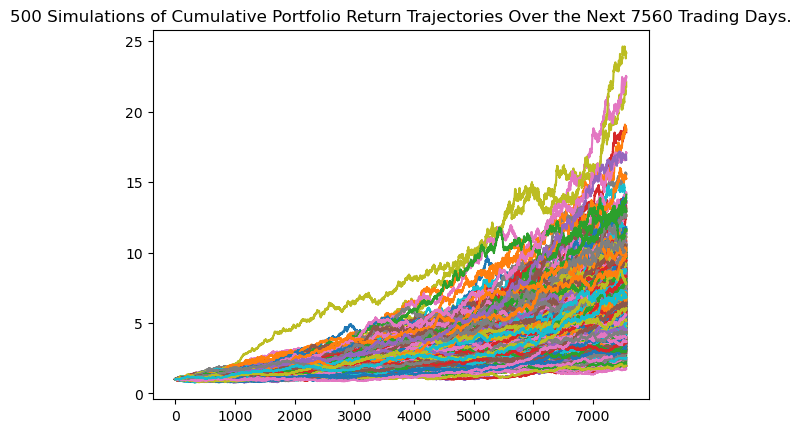

In [54]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

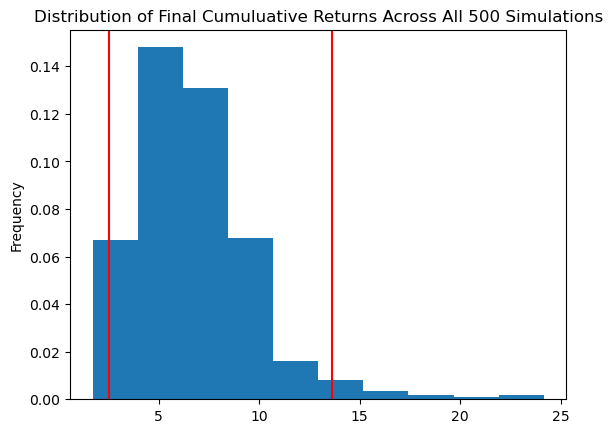

In [55]:
# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_metrics_equal = MC_portfolio.simulated_return.iloc[-1].describe()
ci_series_equal = MC_portfolio.confidence_interval
ci_series_equal.index = ["95% CI Lower", "95% CI Upper"]

#Concatenate metrics and confidence interval series into a DataFrame
summary_tbl_df= pd.concat([summary_metrics_equal, ci_series_equal], axis=0)

# Print summary statistics
print(summary_tbl_df)

count           500.000000
mean              6.774642
std               2.982262
min               1.730499
25%               4.831271
50%               6.346708
75%               8.293596
max              24.161221
95% CI Lower      2.515923
95% CI Upper     13.641736
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [57]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl_df["95% CI Lower"]* initial_investment,2)
ci_upper = round(summary_tbl_df["95% CI Upper"]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50318.45 and $272834.71


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [58]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl_df["95% CI Lower"]* initial_investment,2)
ci_upper = round(summary_tbl_df["95% CI Upper"]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $75477.68 and $409252.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [60]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [61]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [62]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [64]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [67]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [68]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [70]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
